<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/TextGenerationWithNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generate the Text Using Neural Network**

### Imports

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential

## Build the word Vocabulary

In [8]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus=data.lower().split("\n")
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [9]:
# Initialize teh tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1
print(f"Word inidex dictionary {tokenizer.word_index}")
print(f"Total Words :{total_words}")

Word inidex dictionary {'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 8

In [31]:
# Initialize the sequence List
input_sequences =[]
for line in corpus:
  # Toeknize the current line
  token_list = tokenizer.texts_to_sequences([line])[0]
  # Loop over line to genrate sub phrases
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    # Append the sub phrases to the sequence
    input_sequences.append(n_gram_sequence)

# Get the lenght of largestlne
max_sequence_len =max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences=np.array(pad_sequences(input_sequences,padding='pre',maxlen=max_sequence_len))

# Create inputs and labels by splitting the last tokens
xz, labels = input_sequences[:,:-1], input_sequences[:,-1]

# Convert label into one hot array
ys=tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [32]:
# Get the sentence
sentence = corpus[0].split()
print(f"Sample sentence : {sentence}")

Sample sentence : ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']


In [33]:
token_list=[]
for word in sentence:
  token_list.append(tokenizer.word_index[word])
print(f"Token List {token_list}")

Token List [4, 2, 66, 8, 67, 68, 69, 70]


In [34]:
#Lets pick an element 
elem_number=6

# Print tokenlist and pharse
print(f"token list : {xz[elem_number]}")
print(f"Decoded to text : {tokenizer.sequences_to_texts([xz[elem_number]])}")

token list : [ 0  0  0  4  2 66  8 67 68 69]
Decoded to text : ['in the town of athy one jeremy']


In [35]:
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 70


### Build the Model

In [36]:
model=Sequential([
                  Embedding(total_words,64,input_length=max_sequence_len-1),
                  Bidirectional(LSTM(20)),
                  Dense(total_words, activation='softmax')

])
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']    
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 64)            16832     
                                                                 
 bidirectional_2 (Bidirectio  (None, 40)               13600     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 263)               10783     
                                                                 
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


### Traint he model

In [37]:
history = model.fit(xz,ys,epochs=500)

Epoch 1/500
15/15 [==============================] - 3s 8ms/step - loss: 5.5697 - accuracy: 0.0132
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 5.5480 - accuracy: 0.0618
Epoch 3/500
15/15 [==============================] - 0s 7ms/step - loss: 5.4999 - accuracy: 0.0684
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 5.3511 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 7ms/step - loss: 5.1596 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0763 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0316 - accuracy: 0.0530
Epoch 8/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9978 - accuracy: 0.0530
Epoch 9/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9655 - accuracy: 0.0574
Epoch 10/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9293 - accuracy: 0.0574
Epoch 11/

### Visualize the results

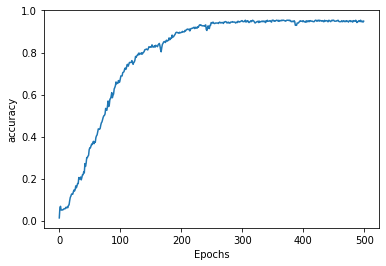

In [38]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

## Generating Text

### With the model trained, you can now use it to make its own song! The process would look like:





1.   Feed a seed text to initiate the process.

2.   Model predicts the index of the most probable next word.
3.   Look up the index in the reverse word index dictionary
4.   Append the next word to the seed text.
5.   Feed the result to the model again.





In [42]:
# Define the seed text 
seed_text = "Hrushi went to London"
# Define total number of words to predict
next_words = 50

# loop till desired length is reached

for _ in range(next_words):
  # Convert the seed text to token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

  # pad the sequences
  token_list = pad_sequences([token_list],maxlen=max_sequence_len-1 ,padding='pre')

  # Feed to the model and predict the probabilities for each index
  probabilities = model.predict(token_list)

  # Get the index with highest probabilities
  predicted = np.argmax(probabilities, axis=-1)[0]

  if predicted !=0:

    # Look for word associated witht index
    output_word = tokenizer.index_word[predicted]

    # Combine with seed text
    seed_text +=" " +output_word

print(seed_text)

Hrushi went to London til youd couples all entangled entangled entangled me singing ball ball forget round wall come ball at wall wall wall wall wall come lanigans ball ball come ball at soon right finnertys in hoops glisten glisten glisten glisten cask swore come creature and them entangled me singing ball me til


### Instead of getting the index with max probability, I will get the top three indices and choose one at randomI

In [44]:
# Define the seed text 
seed_text = "Hrushi went to London"
# Define total number of words to predict
next_words = 50

# loop till desired length is reached

for _ in range(next_words):
  # Convert the seed text to token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

  # pad the sequences
  token_list = pad_sequences([token_list],maxlen=max_sequence_len-1 ,padding='pre')

  # Feed to the model and predict the probabilities for each index
  probabilities = model.predict(token_list)

  # Get the index with highest probabilities
  choice = np.random.choice([1,2,3])
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]
  if predicted !=0:

    # Look for word associated witht index
    output_word = tokenizer.index_word[predicted]

    # Combine with seed text
    seed_text +=" " +output_word

print(seed_text)

Hrushi went to London singing around stepped in at phelim water gave nonsensical eyes mchugh stretched by the satisfaction steps ball round lanigans ball ball the ball satisfaction how come creature fainted meelia ground me til groups groups all fainted out entangled hadnt by how nelly gray a daughter their jig daughter kerrigan being
